In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_learn = pd.read_csv('df_learn.csv')
df_baseline = pd.read_csv('df_baseline.csv')
df_relearn = pd.read_csv('df_relearn.csv')
df_unlearn = pd.read_csv('df_unlearn.csv')
df_allphases = pd.read_csv('df_allphases.csv')


,target_x,target_y,p_id,avg errors,trial,block,Rotation,Emphasis,init errors,phase,trial no,block no
0,0.3,-0.3,641,NaN,0.0,0.0,Gradual,Accuracy,0.415961,Baseline,0,1
1,-0.3,0.3,641,NaN,1.0,0.0,Gradual,Accuracy,0.131428,Baseline,1,1
2,0.3,-0.3,641,NaN,2.0,0.0,Gradual,Accuracy,0.206181,Baseline,2,1
3,0.3,-0.3,641,NaN,3.0,0.0,Gradual,Accuracy,0.206181,Baseline,3,1
4,-0.3,0.3,641,NaN,4.0,0.0,Gradual,Accuracy,0.495885,Baseline,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43643,0.3,-0.3,702,0.402465,123.0,1.0,Sudden,Speed,1.203681,Relearning,699,10
43644,0.3,0.3,702,0.827459,124.0,1.0,Sudden,Speed,0.704598,Relearning,700,10
43645,0.3,0.3,702,0.827459,125.0,1.0,Sudden,Speed,0.704598,Relearning,701,10
43646,-0.3,-0.3,702,0.715479,126.0,1.0,Sudden,Speed,1.933589,Relearning,702,10


In [8]:
def extract_blockwise(df):
    # # Drop columns: 'cursor trajectory', 'target_x', 'target_y'
    df = df.drop(columns=['cursor trajectory', 'target_x', 'target_y'])
    # # Performed 2 aggregations grouped on columns: 'p_id', 'block' and 2 other columns
    df = df.groupby(['p_id', 'block', 'Rotation', 'Emphasis']).agg(avgerrors_mean=('avg errors', 'mean'), initerrors_mean=('init errors', 'mean')).reset_index()
    # For all phases file, columns are a bit different. Uncomment below comment above
    # df = df.groupby(['p_id', 'block no', 'Rotation', 'Emphasis']).agg(avgerrors_mean=('avg errors', 'mean'), initerrors_mean=('init errors', 'mean')).reset_index()

    return df

df_learn_blockwise = extract_blockwise(df_learn.copy())
df_unlearn_blockwise = extract_blockwise(df_unlearn.copy())
df_relearn_blockwise = extract_blockwise(df_relearn.copy())
# df_allphases_blockwise = extract_blockwise(df_allphases.copy())

# df_learn_blockwise = extract_blockwise(df_learn.copy())


In [14]:
# df_allphases_blockwise = pd.read_csv('df_allphases_blockwise.csv')
# df_allphases_blockwise['initsignederrors_mean_degrees'] = df_allphases_blockwise['initsignederrors_mean']*180/np.pi
# df_allphases_blockwise['initerrors_mean_degrees'] = df_allphases_blockwise['initerrors_mean']*180/np.pi


In [4]:
df_allphases = pd.read_csv('df_allphases.csv')
df_allphases_blockwise = pd.read_csv('df_allphases_blockwise.csv')

In [6]:
df_allphases_blockwise['init_errors'] = df_allphases_blockwise['init errors']
df_allphases_blockwise['init_signed_errors'] = df_allphases_blockwise['init signed errors']
df_allphases_blockwise['init_errors_degrees'] = df_allphases_blockwise['init errors degrees']
df_allphases_blockwise['init_signed_errors_degrees'] = df_allphases_blockwise['init signed errors degrees']
df_allphases_blockwise['avg_errors_degrees'] = df_allphases_blockwise['avg errors']*180/np.pi
df_allphases_blockwise['avg_signed_errors_degrees'] = df_allphases_blockwise['avg errors']*180/np.pi
df_allphases_blockwise.loc[df_allphases_blockwise['init_signed_errors'] < 0, 'avg_signed_errors_degrees'] = -df_allphases_blockwise.loc[df_allphases_blockwise['init_signed_errors'] < 0, 'avg_signed_errors_degrees']




In [7]:
sns.set(font_scale = 2)
sns.set_style('white')
colors = [  '#808A87', '#292421',]
sns.set_palette(sns.color_palette(colors))


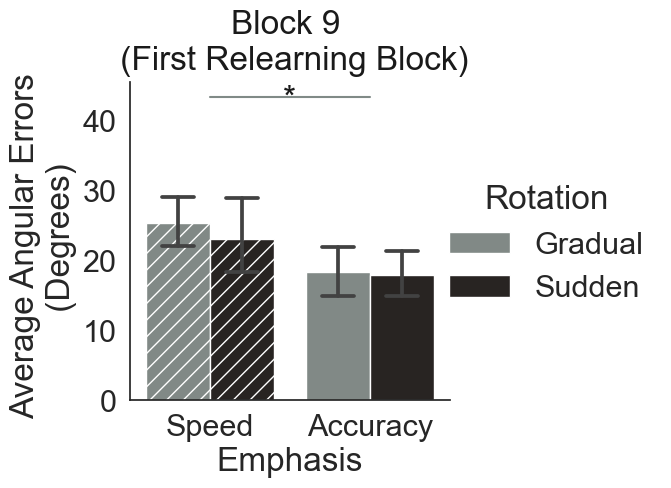

In [48]:
g = sns.catplot(x = 'Emphasis', hue = 'Rotation', y = 'avg_errors_degrees', col = 'block',
            data = df_allphases_blockwise.loc[((df_allphases_blockwise['block']==9))],
            kind = 'bar', capsize = 0.2, hue_order=['Gradual', 'Sudden'], order = ['Speed', 'Accuracy']
            )
x1, x2 = 0, 1
y, h, col = df_allphases_blockwise.loc[(df_allphases_blockwise['block'] == 9)]['avg_errors_degrees'].max(), 0.02, 'k'
plt.text(0.5, y+h-4.5, "Block 9 \n (First Relearning Block)", ha='center', va='bottom', color=col)
plt.text(0.5, y+h-10, "*", ha='center', va='bottom', color=col)
plt.axhline(xmin=0.25, xmax=0.75, y = y+h-7.5)

# plt.text(0, y+h-15, "*", ha='center', va='bottom', color=col)
# plt.axhline(xmin=0.125, xmax=0.375, y = y+h-13)

# plt.text(1, y+h-15, "*", ha='center', va='bottom', color=col)
# plt.axhline(xmin=0.625, xmax=0.875, y = y+h-13)


g.set(ylabel='Average Angular Errors \n (Degrees)')
g.set(title=None)

# g.set_yl
hatches = ['//', '', '//', '']
for ax in g.axes.flat:
    patches = [patch for patch in ax.patches]
    for i, patch in enumerate(patches):
        patch.set_hatch(hatches[i])


In [24]:
model = ols(
    'avg_errors_degrees ~ C(Rotation) * C(Emphasis)', data=df_allphases_blockwise.loc[((df_allphases_blockwise['block']==9))]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Rotation),29.473275,1.0,0.405107,0.526968
C(Emphasis),584.402086,1.0,8.032542,0.006312
C(Rotation):C(Emphasis),12.129170,1.0,0.166714,0.684552
Residual,4219.750117,58.0,NaN,NaN


In [52]:
model = ols(
    'avg_errors_degrees ~ C(Rotation) * C(Emphasis) * C(block)', data=df_allphases_blockwise.loc[((df_allphases_blockwise['block']==9) | (df_allphases_blockwise['block']==7))]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Rotation),395.575318,1.0,5.411096,0.021746
C(Emphasis),1303.972998,1.0,17.837116,0.000048
C(block),387.403557,1.0,5.299314,0.023118
C(Rotation):C(Emphasis),29.225721,1.0,0.399780,0.528447
C(Rotation):C(block),149.118528,1.0,2.039800,0.155917
C(Emphasis):C(block),3.697114,1.0,0.050573,0.822465
C(Rotation):C(Emphasis):C(block),0.231175,1.0,0.003162,0.955252
Residual,8480.119204,116.0,NaN,NaN


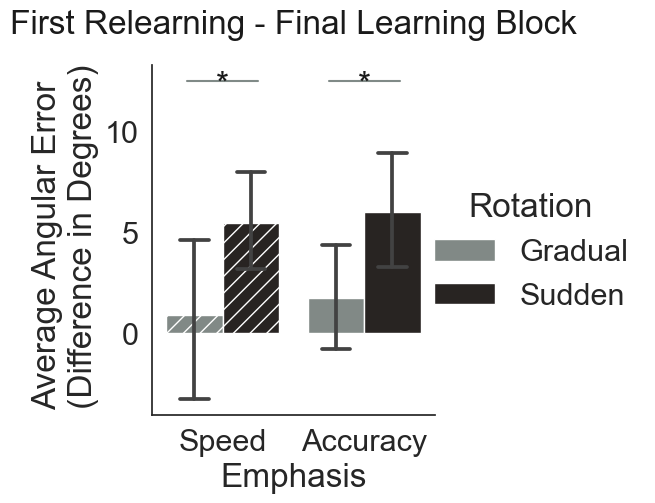

In [54]:
df_allphases_blockwise['difference_2'] = df_allphases_blockwise['avg_errors_degrees'].diff(periods= 2)#*180/np.pi

g = sns.catplot(y = 'difference_2', x = 'Emphasis', hue = 'Rotation', 
            data = df_allphases_blockwise.loc[((df_allphases_blockwise['block'] == 9))], 
            kind = 'bar', capsize = 0.2, hue_order=['Gradual', 'Sudden'], order = ['Speed', 'Accuracy'])
    
# g.set_ylabels('Error Difference \n Relearning - Learning')
x1, x2 = 0, 1
y, h, col = df_allphases_blockwise.loc[(df_allphases_blockwise['block'] == 9)]['difference_2'].max()+0.1, 0.02, 'k'
plt.text(0.5, y+h-5, "First Relearning - Final Learning Block", ha='center', va='bottom', color=col)

# plt.text(0.5, y+h-10, "*", ha='center', va='bottom', color=col)
# plt.axhline(xmin=0.25, xmax=0.75, y = y+h-8)

plt.text(0, y+h-8, "*", ha='center', va='bottom', color=col)
plt.axhline(xmin=0.125, xmax=0.375, y = y+h-7)

plt.text(1, y+h-8, "*", ha='center', va='bottom', color=col)
plt.axhline(xmin=0.625, xmax=0.875, y = y+h-7)

g.set(ylabel='Average Angular Error \n (Difference in Degrees)')
g.set(title=None)

# g.set_yl
hatches = ['//', '', '//', '']
for ax in g.axes.flat:
    patches = [patch for patch in ax.patches]
    for i, patch in enumerate(patches):
        patch.set_hatch(hatches[i])



In [49]:
model = ols(
    'difference_2 ~ C(Rotation) * C(Emphasis)', data=df_allphases_blockwise.loc[((df_allphases_blockwise['block']==9))]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Rotation),298.237056,1.0,7.455319,0.008363
C(Emphasis),7.394229,1.0,0.184841,0.668839
C(Rotation):C(Emphasis),0.462349,1.0,0.011558,0.914758
Residual,2320.189011,58.0,NaN,NaN


In [12]:
df_allphases['init_errors_degrees'] = df_allphases['init errors']*180/np.pi

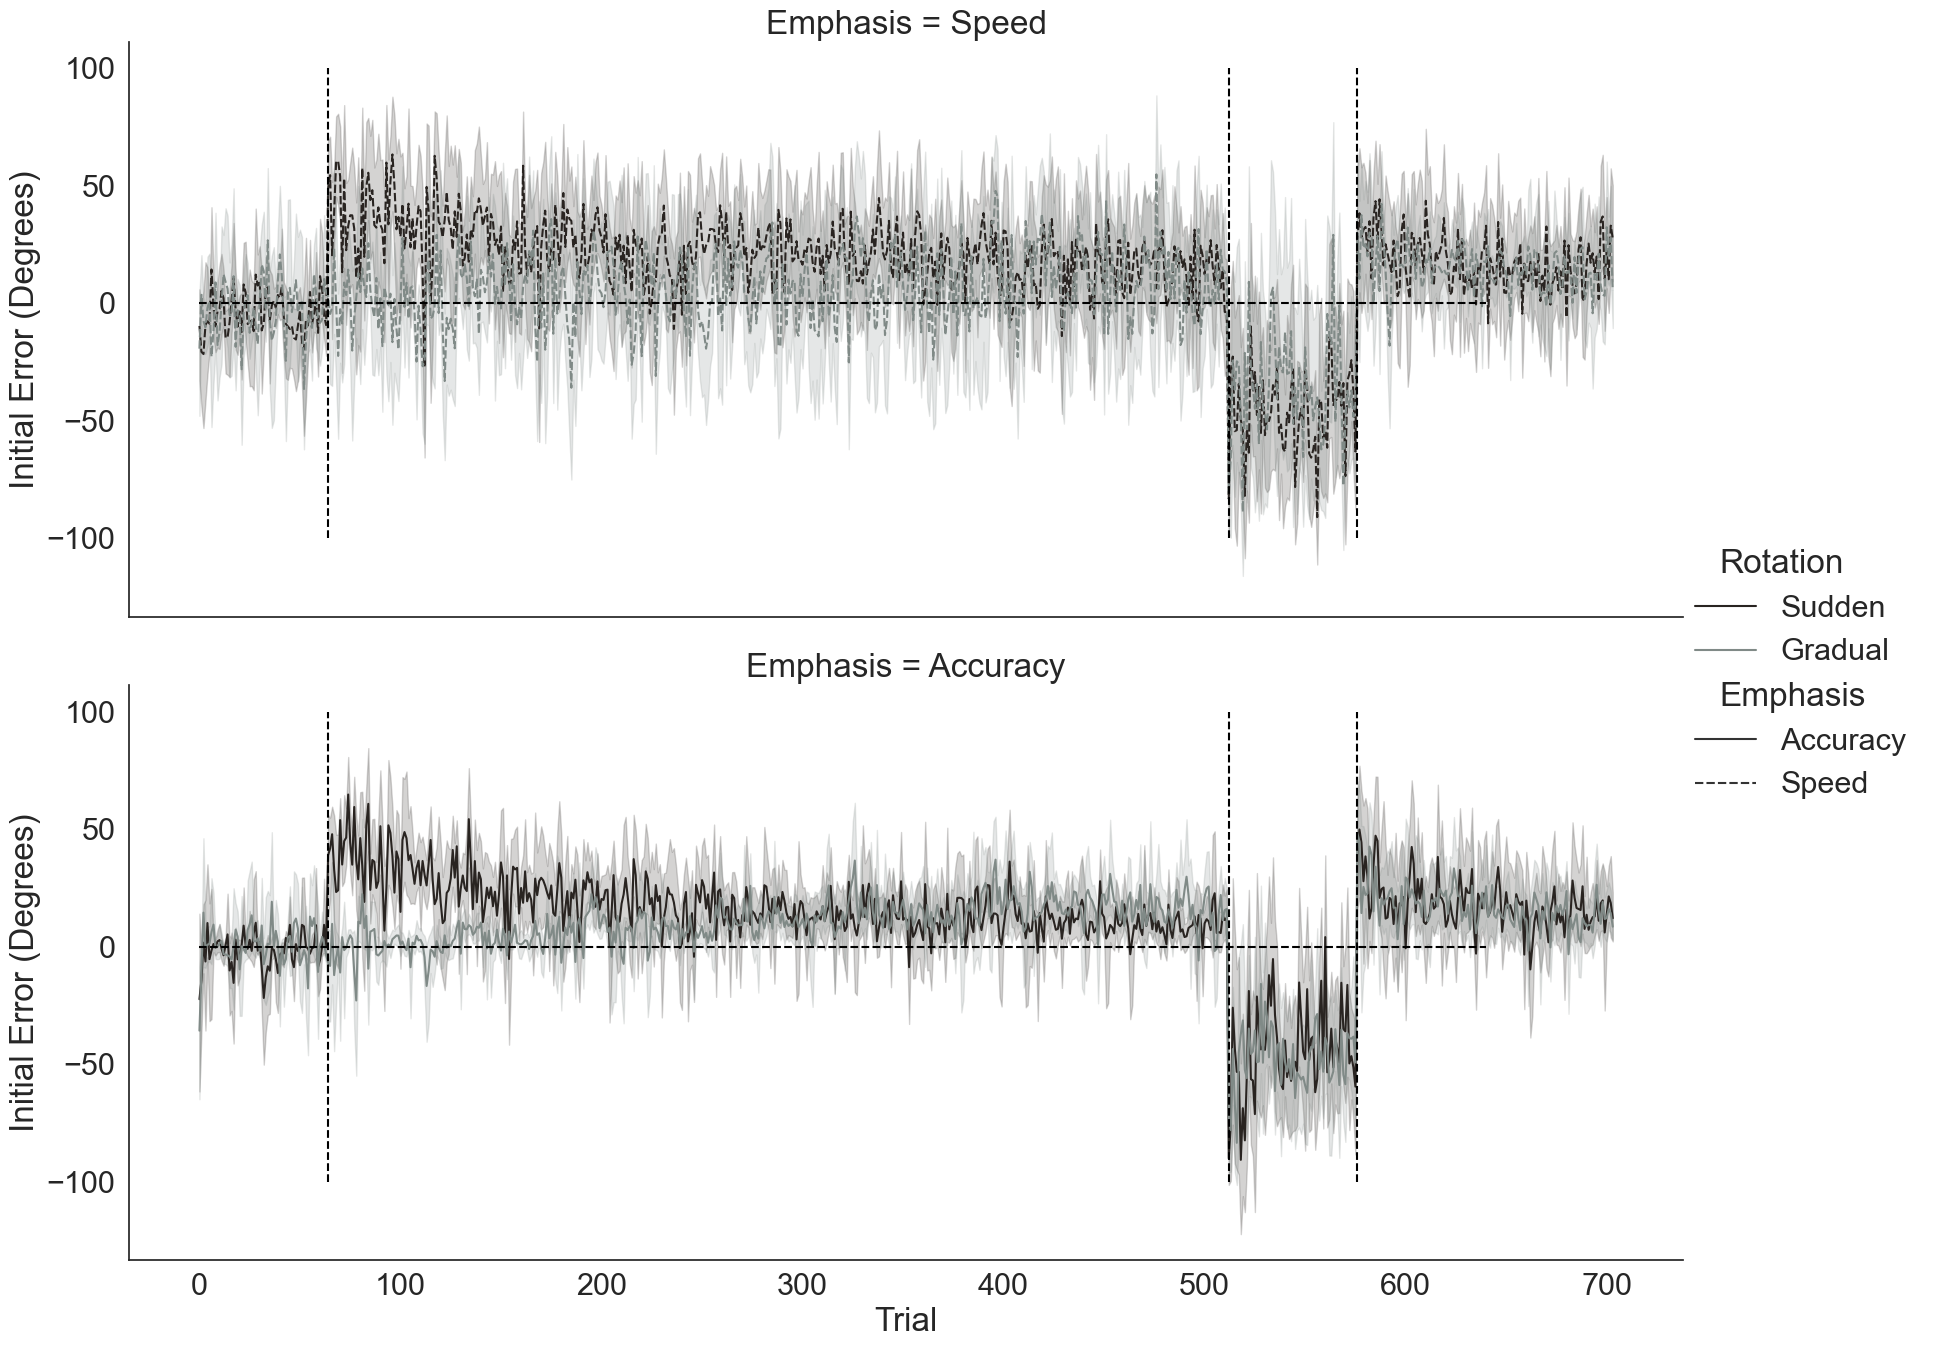

In [78]:
sns.set_context('talk')
sns.set(font_scale = 2)
sns.set_style('white')
colors = [ '#292421', '#808A87']
sns.set_palette(sns.color_palette(colors))

g = sns.relplot(x = 'trial', y = 'init signed errors degrees', hue = 'Rotation', row = 'Emphasis', style='Emphasis', 
                 style_order=['Accuracy', 'Speed'], hue_order=['Sudden', 'Gradual'], row_order=['Speed', 'Accuracy'],
            data = df_allphases, height = 7, aspect = 2.5, kind = 'line')
g.set_axis_labels('Trial', 'Initial Error (Degrees)')

# draw lines:
for ax in g.axes.ravel():
    ax.vlines(x = 64, ymax=100, ymin = -100, color = 'black', linestyles = '--')
    ax.vlines(x = 64*8, ymax=100, ymin = -100, color = 'black', linestyles = '--')
    ax.vlines(x = 64*9, ymax=100, ymin = -100, color = 'black', linestyles = '--')

    ax.hlines(y=0, xmin = 0, xmax = 640, color = 'black', linestyles = '--')

In [48]:
df_allphases_blockwise['difference_2'] = df_allphases_blockwise['initerrors_mean'].diff(periods= 2)

model = ols(
    'difference_2 ~ C(Rotation) * C(Emphasis)', data=df_allphases_blockwise.loc[((df_allphases_blockwise['block_no']==9))]).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Rotation),0.585699,1.0,4.693283,0.034403
C(Emphasis),0.769121,1.0,6.163071,0.015960
C(Rotation):C(Emphasis),0.035977,1.0,0.288291,0.593372
Residual,7.238119,58.0,NaN,NaN


In [49]:
df_allphases_blockwise['Condition'] = df_allphases_blockwise['Rotation'] + ' ' + df_allphases_blockwise['Emphasis']

In [53]:
gs_diff = df_allphases_blockwise.loc[((df_allphases_blockwise['block_no']==9) & ((df_allphases_blockwise['Condition']=='Gradual Speed'))), 'difference_2'].values
oth_diff = df_allphases_blockwise.loc[((df_allphases_blockwise['block_no']==9) & ((df_allphases_blockwise['Condition']!='Gradual Speed'))), 'difference_2'].values


In [54]:
stat.ttest_ind(gs_diff, oth_diff)

Ttest_indResult(statistic=-2.937093879179875, pvalue=0.004693426975527388)

Ttest_indResult(statistic=-0.3121275428229754, pvalue=0.7560257407357927)

In [ ]:
stat.ttest_ind_from_stats()

In [57]:
single_fits = pd.read_csv('model_results/single_fit_initerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
dual_fits = pd.read_csv('model_results/dual_fit_initerror_results.csv').drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis = 1)
single_fits.loc[single_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
single_fits.loc[single_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

single_fits.loc[single_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
single_fits.loc[single_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
single_fits.loc[single_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


dual_fits.loc[dual_fits['p_id']%2 == 0, 'Rotation'] = 'Sudden'
dual_fits.loc[dual_fits['p_id']%2 == 1, 'Rotation'] = 'Gradual'

dual_fits.loc[dual_fits['p_id']%4 == 0, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 1, 'Emphasis'] = 'Accuracy'
dual_fits.loc[dual_fits['p_id']%4 == 2, 'Emphasis'] = 'Speed'
dual_fits.loc[dual_fits['p_id']%4 == 3, 'Emphasis'] = 'Speed'


single_fits['Condition'] = single_fits['Rotation'] + ' ' + single_fits['Emphasis']

In [59]:
single_fits['Learning x Retention'] = single_fits['A'] * single_fits['B']
dual_fits['Fast Learning x Retention'] = dual_fits['Af'] * dual_fits['Bf']
dual_fits['Slow Learning x Retention'] = dual_fits['As'] * dual_fits['Bs']



In [106]:
improv_rate_melt

,pid,Condition,State,Learning x Retention
0,641,Gradual Accuracy,Single,0.051518
1,642,Sudden Speed,Single,0.000000
2,643,Gradual Speed,Single,0.008926
3,644,Sudden Accuracy,Single,0.002422
4,645,Gradual Accuracy,Single,0.176941
...,...,...,...,...
243,698,Sudden Speed,Fast_by_Slow,0.000000
244,699,Gradual Speed,Fast_by_Slow,0.000000
245,700,Sudden Accuracy,Fast_by_Slow,3.427449
246,701,Gradual Accuracy,Fast_by_Slow,0.000000


# Produce the performance - report plot

In [113]:
df_aim = pd.read_csv('df_aim.csv')

# df_aim_clean['perf'] = df_allphases_blockwise.loc[df_allphases_blockwise['block'] == 7, 'init errors degrees'].values
# df_aim_clean['perf - report'] = 60-df_aim_clean['perf'] - (60 - df_aim_clean['optimalreportreport_mean_mean'])
# df_aim_clean['perf - swipe'] = (60 - df_aim_clean['perf']) - (60 - df_aim_clean['optimalreportswipe_mean_mean'])
df_aim


,target_x,target_y,p_id,target angle,Rotation,Emphasis,aimreport_mean,optimalreport_mean,optimalreportreport_mean,aimreportswipe_mean,swipeangle_mean,optimalreportswipe_mean
0,-0.3,-0.3,641,225.0,Gradual,Accuracy,269.0,165.0,-104.0,127.564035,141.435965,23.564035
1,-0.3,-0.3,642,225.0,Sudden,Speed,226.0,165.0,-61.0,70.915141,155.084859,9.915141
2,-0.3,-0.3,643,225.0,Gradual,Speed,182.0,165.0,-17.0,28.991867,153.008133,11.991867
3,-0.3,-0.3,644,225.0,Sudden,Accuracy,203.0,165.0,-38.0,75.644814,127.355186,37.644814
4,-0.3,-0.3,645,225.0,Gradual,Accuracy,273.0,165.0,-108.0,146.860274,126.139726,38.860274
...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.3,0.3,698,45.0,Sudden,Speed,50.0,345.0,65.0,-90.392966,140.392966,155.392966
244,0.3,0.3,699,45.0,Gradual,Speed,35.0,345.0,50.0,-113.660678,148.660678,163.660678
245,0.3,0.3,700,45.0,Sudden,Accuracy,58.0,345.0,73.0,-51.727609,109.727609,124.727609
246,0.3,0.3,701,45.0,Gradual,Accuracy,176.0,345.0,100.5,43.487469,132.512531,147.512531


In [ ]:
g = sns.catplot(y = 'perf - report', x = 'Emphasis', hue = 'Rotation', 
            data = df_aim_clean, 
            kind = 'bar', capsize = 0.2)
    
# g.set_ylabels('Error Difference \n Relearning - Learning')
x1, x2 = 0, 1
# y, h, col = df_allphases_blockwise.loc[(df_allphases_blockwise['block no'] == 6)]['difference_2'].max()+0.1, 0.02, 'k'
# plt.text(0.5, y+h, "First Relearning - Last Learning Blocks", ha='center', va='bottom', color=col)
# plt.text(0.5, y+h-10, "*", ha='center', va='bottom', color=col)

# plt.text(0, y+h-15, "*", ha='center', va='bottom', color=col)
# plt.text(1, y+h-15, "*", ha='center', va='bottom', color=col)

g.set(ylabel='Learned Perf - Report \n (Degrees)')
g.set(title=None)

# g.set_yl
hatches = ['//', '', '//', '']
for ax in g.axes.flat:
    patches = [patch for patch in ax.patches]
    for i, patch in enumerate(patches):
        patch.set_hatch(hatches[i])



In [112]:
stat.ttest_ind(
df_aim_clean.loc[((df_aim_clean['Emphasis']!='Speed') | (df_aim_clean['Rotation']!='Gradual')),  'perf - report'], 
df_aim_clean.loc[((df_aim_clean['Emphasis']=='Speed') & (df_aim_clean['Rotation']=='Gradual')),  'perf - report']
)

Ttest_indResult(statistic=-1.1326826470956168, pvalue=0.2618537163692996)

In [111]:
df_aim_clean.loc[((df_aim_clean['Emphasis']=='Speed') & (df_aim_clean['Rotation']=='Gradual')),  'perf - report']


2     11.467887
6    -13.900954
10   -50.991851
14    -7.431847
18    -6.312786
22   -16.680583
26   -27.801218
30   -42.844629
34    39.168834
38   -26.198369
42   -66.082655
46   -20.547247
50   -31.580836
54   -32.519989
58   -39.753544
Name: perf - report, dtype: float64